# Exploratory Data Analysis: A briefly view into the sociodemographic data from Mexican National Suverey of Occupation and Employment (ENOE) - Q4/2021

## 1. Starting with the details

<p style='text-align: justify;'>  
The enoe is the main source of information on the Mexican labor market and provides data on the labor force, occupation, labor informality, underemployment, and unemployment.The enoe's microdata it's composed of 5 csv files, for this analysis, I am focusing to explor some variables contains into the sociodemographic questionnaire.
    </p>

In [1]:
#import pandas library
import pandas as pd

In [2]:
''' 
One of the first issues that I have to solve was the encoding, some Inegi's csv files
don't be read with the default encoding 'UTF-8'
'''
#set the sociodemographic questionnarie 4t 2021 file
df = pd.read_csv ('data/ENOEN_SDEMT421.csv', encoding = "ISO-8859-1")

/home/hugo_arellano/anaconda3/envs/geo_ds/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,5,8,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#in order to get general information about the dataset...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434826 entries, 0 to 434825
Columns: 114 entries, r_def to mes_cal
dtypes: float64(1), int64(82), object(31)
memory usage: 378.2+ MB


In [4]:
# are there any rows dupplicated? (watch the left number)
df[df.duplicated()].shape

(0, 114)

In [5]:
# are there any nulls values?
(df.isnull().sum()).sum()

0

## 1.1 Dataset structure 

You can look it in deep the dataset structure in the following link:
https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/fd_c_bas_amp_15ymas.pdf

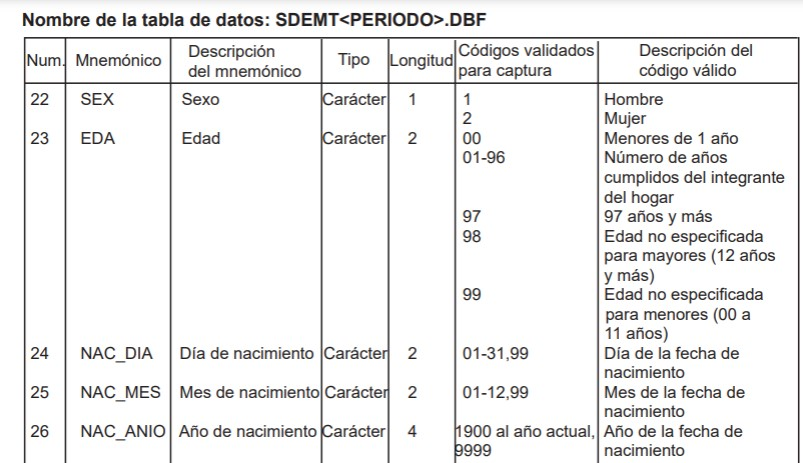

In [6]:
# A briefly view over the dataset structure 
from IPython.display import Image
Image("sdem2.jpg")

The sdem cuestionnarie has 114 cols, we only need some of the for this practice:
* ent: Mexican States
* sex: Sex
* eda: Years old
* e_con: Conjugal status
* ambito2: Size clasification by economic units
* hrsocup: Hours by weekend labor journal
* ingocup: Montly income for work 
* ing_x_hrs: Income by hour
* anios_esc: education years
* seg_soc: Clasification by social security
* emp_ppal: Employment clasification by formal/informal
* scian: Industrial clasification system for North America
* clase3: clasification by population employed/unemployed

In [7]:
#cols selection 
df = df[['ent','sex','eda','e_con','ambito2','hrsocup',
        'ingocup','ing_x_hrs','anios_esc','seg_soc',
        'emp_ppal','scian','clase3']]

In [8]:
#We only need in the dataset the people with income by occupation
df = df[(df['clase3'] == 1) & (df['ingocup']>0)]

#we don't need this col before this, so I'll drop it. 
df = df.drop(['clase3'], axis=1)

In [9]:
#Transforming string data to numeric
df = df.astype('float64')

In [10]:
'''Some numbers, in columns have a categorical meaning or/and don't have practical
value for this analysis, so I'll drop it.
'''
df = df[(df['e_con'] != 9)] 
df = df[(df['eda'] <=97)]
df = df[(df['anios_esc']!=99)]
df = df[(df['seg_soc']!=3)]

## 1.2 Add labels to categorical cols

In [11]:
df["ent"] = df['ent'].replace({1: "Aguascalientes", 2:"BC", 3:"BCS",
                               4: "Campeche", 5: "Coahuila", 6: "Colima",
                               7: "Chiapas", 8: "Chihuahua", 9: "Cdmx",
                               10: "Durango", 11: "Guanajuato", 12: "Guerrero",
                               13: "Hidalgo", 14: "Jalisco", 15: "Edo mex",
                               16: "Michoacan", 17: "Morelos", 18: "Nayarit",
                               19: "Nuevo leon", 20: "Oaxaca", 21: "Puebla", 
                               22: "Queretaro", 23: "Quintana roo", 24: "Slp",
                               25: "Sinaloa", 26: "Sonora", 27: "Tabasco",
                               28: "Tamaulipas", 29: "Tlaxcala", 30: "Veracruz",
                               31: "Yucatan", 32: "Zacatecas"})


df["sex"] = df["sex"].replace({1: "hombre", 2: "mujer"})

df["e_con"] = df["e_con"].replace({1: "union libre", 2: "separado", 
                                          3: "divorciado", 4: "viudo", 5: 
                                          "casado", 6:"soltero"})

df["ambito2"] = df["ambito2"].replace({2: "Micronegocios sin establecimiento", 3: "Micronegocios con establecimiento",
                                                      4: "Pequeños establecimientos", 5: "Medianos establecimientos",
                                                      6: "Grandes establecimientos", 7: "Gobiernos", 8: "Otros"})

df["seg_soc"] = df["seg_soc"].replace({1: "Con acceso", 2: "Sin acceso"})

df["seg_soc"] = df["seg_soc"].replace({1: "Con acceso", 2: "Sin acceso"})

df["seg_soc"] = df["seg_soc"].replace({1: "Con acceso", 2: "Sin acceso"})

df["emp_ppal"] = df["emp_ppal"].replace({1: "empleo informal",2:"empleo formal"})

df["scian"] = df["scian"].replace({1: "agricultura, ganaderia, pesca, etc",2:"mineria",
                                                    3:"electricidad, agua y gas", 4:"construccion",
                                                    5:"industrias manufactureras", 6:"comercio al por mayor",
                                                    7:"comercio al por menor", 8:"transportes, correos y almacenamiento",
                                                    9:"informacion en medios masivos", 10:"servicios financieros y de seguros",
                                                    11:"servicios inmobiliarios y de alquiler",
                                                    12:"servicios profesionales cientificos y tecnicos",
                                                    13:"corporativos", 14:"servicios de apoyo a los negocios y manejo de desechos",
                                                    15:"servicios educativos",16:"servicios de salud y asistencia social",
                                                    17:"servicios de esparcimiento, culturales y deportivos",
                                                    18:"servicios de hospedaje y preparacion de alimentos y bebidas", 
                                                    19:"otros servicios, excepto actividades gubernamentales",
                                                    20:"actividades gubernamentales y de organismos internacionales",
                                                    21:"no especificado" })

## 2. Handling the outliers

In [12]:
'''
After cleaning the dataset we have the following dimensions
--- now - 128537 rows / 12 cols
--- begining - 434825 rows / 114 cols 
'''

df.shape

(128537, 12)

We only have to deal with the outliers, and we get the final dataset, to achieve this I'll use a z-score to drop the outliers. I think this is a nice tool because dropping a minimal part of the data set (only the values +- 3rd standard deviation) allows me to make a sharp data interpretation.

In [13]:
#numeric cols
num_cols = df.select_dtypes(['int', 'float']).columns

In [14]:
import numpy as np
from scipy import stats

In [15]:
# how many outliers there are?
def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(df)

eda | 220 | float64
hrsocup | 572 | float64
ingocup | 2172 | float64
ing_x_hrs | 1418 | float64
anios_esc | 0 | float64


/tmp/ipykernel_86011/3620851188.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


Almost all numeric cols have outliers, the exception is anios_esc (education years). Boxplot allows us to give a brief view of the outliers.

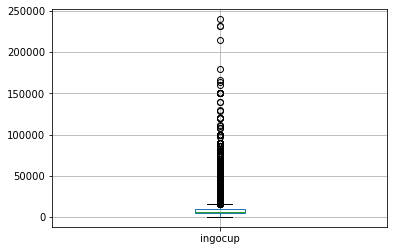

In [16]:
'''
In this boxplot, we can see that a considerable part of the values are out of the 
upper whisker, so that means that some of highly income values (in this case), 
might be altered significantly the data interpretation
'''
df.boxplot(column='ingocup');

In [17]:
'''
droping the outliers
'''
ndf = df[np.abs(stats.zscore(df[num_cols])< 3).all(axis=1)]

In [18]:
# new df
ndf.shape

(124782, 12)

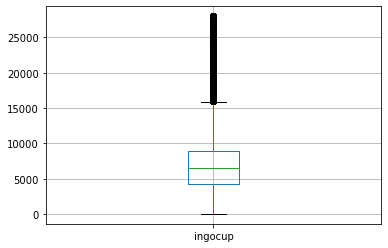

In [19]:
'''
We can see that the highest values of the dataset are considerably lowest than
the previous dataset. 
'''
ndf.boxplot(column='ingocup');

## 3. Distribution of variables

### 3.1 Numeric variable distribution

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

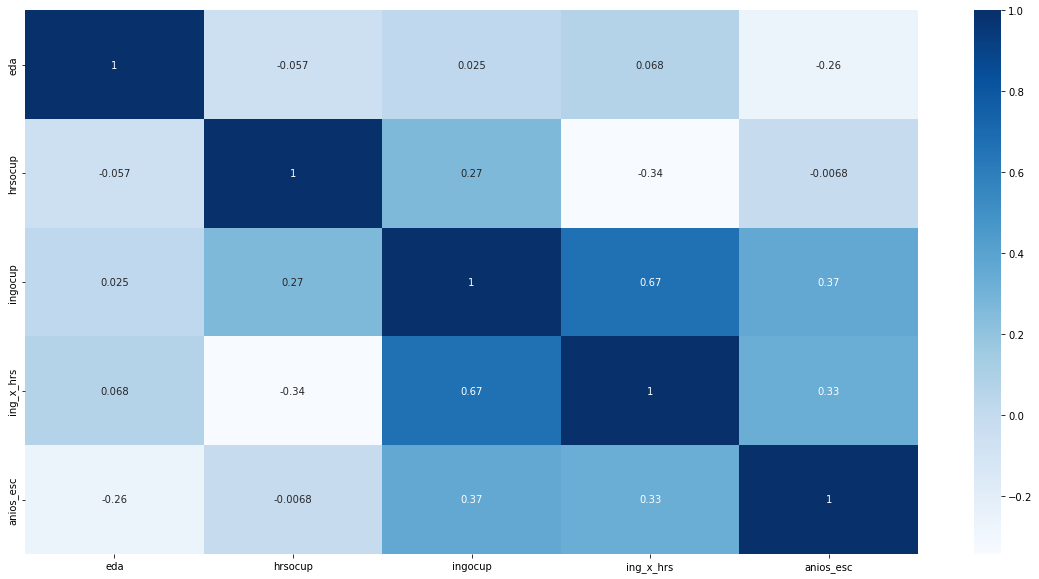

In [21]:
plt.rcParams['figure.figsize'] = (14,14)
plt.figure(figsize=(20,10))
c = ndf.corr()
sns.heatmap(c,cmap="Blues",annot=True)

### Insights about corr map
* There is a correlation between hrsocup and ingocup (0.27) & ing_x_hrs (0.34): We can suggest that
* There is a negative correlation of -0.26 between age and education years, so we can suggest that the new generations of workers in Mexico have a longer educational background than the older generations.
* There is a correlation between monthly income and education years (0.37), and income by the hour worked (0.27), so we can suggest that the workers with the most educational background might be more productive or they get better regardings for their job.


### 3.2 Interactive histogram

Interactive charts are interesting tools that allow us to explore data distribution in a fast way, with the following function we'll plot an interactive histogram, we can change the numeric col and the number of bins in the histogram.

In [22]:
def numeric_variable_distribution(df, col, bins):
    df[col].plot.hist(color='darkblue', bins=bins, histtype='bar', grid=True)
    plt.rcParams['figure.figsize'] = (16,9)
    plt.tick_params(axis='x', colors='white', direction='out',
                   size=15, length=20, width=4)
    plt.tick_params(axis='y', colors='white', direction='out', 
                   size=15, length=20, width=4)
    plt.xlabel('Variable distribution --- {}'.format(col), color = 'white',
              fontsize = 30)
    plt.ylabel('Frecuency', color = 'white', fontsize = 30)
    plt.figure(dpi = 120)
    plt.show()

In [23]:
num_cols = ndf.select_dtypes(['int', 'float']).columns

In [24]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [25]:
interact(numeric_variable_distribution, col=num_cols, df=fixed(ndf),
        bins = widgets.IntSlider(
            value = 10,
            min = 3,
            max = 50,
            step = 1,
        )
        )

interactive(children=(Dropdown(description='col', options=('eda', 'hrsocup', 'ingocup', 'ing_x_hrs', 'anios_es…

<function __main__.numeric_variable_distribution(df, col, bins)>

### 3.2 Categorical variable distribution

Now it's turn of the categorical cols, for this we use a stack plot bar.

In [29]:
def distribution_categorical_cols(col):
    ndf[col].value_counts(ascending=True,normalize=True).plot.barh(color='darkblue')
    plt.rcParams['axes.titley'] = 1.1
    plt.rcParams['figure.figsize'] = (20,11)
    plt.tick_params(axis='x', colors='white', direction='out',
                   size=15, length=20, width=5, labelsize=20)
    plt.tick_params(axis='y', colors='white', direction='out', 
                   size=15, length=20, width=5, labelsize=20)
    plt.xlabel('Variable distribution -- {}'.format(col), color = 'white',
              fontsize = 30)
    plt.title("Categorical Cols", size = 50, color ='white')
    plt.show()

In [30]:
cat_cols = ndf.select_dtypes(['object', 'category']).columns

In [31]:
interact(distribution_categorical_cols, col=cat_cols);

interactive(children=(Dropdown(description='col', options=('ent', 'sex', 'e_con', 'ambito2', 'seg_soc', 'emp_p…

### 3.3 Plot the average: numerical vs categorical

Finally, we do a average comparison between numerical and categorical cols. 

In [32]:
def avg_for_cat(cat_cols, num_cols):
    ndf.groupby(cat_cols)[num_cols].mean().plot.barh(color='darkblue')
    plt.rcParams['axes.titley'] = 1.1
    plt.tick_params(axis='x', colors='white', direction='out',
                   size=12, length=20, width=5, labelsize=20)
    plt.tick_params(axis='y', colors='white', direction='out', 
                   size=12, length=20, width=5, labelsize=20)
    plt.xlabel('Average {}'.format(num_cols),color='white',size=30)
    plt.ylabel((cat_cols), color='white', size=30)
    plt.show()

In [33]:
interact(avg_for_cat, cat_cols=cat_cols, num_cols=num_cols);

interactive(children=(Dropdown(description='cat_cols', options=('ent', 'sex', 'e_con', 'ambito2', 'seg_soc', '…

### Insights
#### - By Age
1. There is a considerable difference between some states in the age average, whereas in Guanajuato is around 35 y.o, in other states like CDMX and Veracruz it’s above 40 y.o. 
2. Generally, people that worked in government are oldest that other sectors ( >40 y.o), whereas people that worked in big corporations are youngest ones.

#### - By ocuppation hours
1. People that worked in Yucatán, on average worked least hours than any other state in Mexico, whereas people that worked in Quintana Roo  worked more hours than any other Mexican State. 
2. Men work on average more hours than the women.
3. People that work in middle establishments work around 50 hours on average. 
4. People that work in educational services, worked least hours (almost above 30), on the other hand, people into transportation or mining worked more hours ( around 52 hours). 

#### - By Monthly income
1. The Mexican states with the highest monthly income are in northern (Baja California Sur, Baja California y Nuevo León), whereas the states with the lowest income on average were Guerrero, Tlaxcala, Oaxaca (southern).
2. Men had in general a high income than women. People that works in government had the highly income than the other sectors.

#### - By Income per worked hour
1. Women earn a little bit more than men per worked hour, but work least hours than men.
2. People that worked in educational services earn more per hour, around 80 mxn per hour, on the other hand people that worked at agro or farmers on average earn least than 30 mxn per hour.

#### - By Education years
1. Women spend more years in education than men.
2. People that worked in educational services have the most education background, whereas farmer people have the least followed by construction and accomodation services. 



